In [1]:
import os
import pickle
def create_folder_if_not_exists(folder_path):
    """
    Creates a folder if it does not exist.

    :param folder_path: Path of the folder to create
    """
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        print(f"Folder '{folder_path}' created.")
    else:
        print(f"Folder '{folder_path}' already exists.")
        
def file_exists(file_path):
    """
    Checks if a file exists.

    :param file_path: Path of the file to check
    :return: True if the file exists, False otherwise
    """
    return os.path.isfile(file_path)

folder_path = 'synthetique_databases'
create_folder_if_not_exists(folder_path)

def save_dic(d,s):
    with open(s+'.pickle', 'wb') as handle:
        pickle.dump(d, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
def read_dic(s):
    with open(s+'.pickle', 'rb') as handle:
        b = pickle.load(handle)
        return b

Folder 'synthetique_databases' already exists.


In [2]:
def repr(i):
    if type(i) == int:
        return str(i)
    else:
        return str(i[0])+"_"+str(i[1])

In [14]:
#generate bipartite graphs
import networkx as nx
start = 1
nb_graphs = 4

list_bip = [i for i in range(start, nb_graphs+start)]
for i in list_bip:
    nb_nodes = i * 1000
    g = nx.complete_bipartite_graph(i * 1000, i * 1000)
    file_path = folder_path + "/bip_" + str(nb_nodes) + "_" + repr(i) + ".edges"
    if not file_exists(file_path):
        nx.write_edgelist(g, file_path, data=False)

In [15]:
l = [("bip", i) for i in range(start, nb_graphs+start)]

In [16]:
#launch pre-computations
import subprocess
algos = ["linear", "ordered", "binary", "alias"]
j = 0
for x in l:
    i = x[1]
    print(i)
    file_path = folder_path + "/" + x[0] +"_" + str(i*1000) + "_" + repr(i) + ".edges"
    #g = nx.read_edgelist(file_path, create_using=nx.Graph, data=False)
    for alg in algos:
        print("filepath : ",file_path)
        subprocess.run(["./main", file_path ,"u", alg, str(0), str(1), str(1), 'c']) 
    j += 1

1
filepath :  synthetique_databases/bip_1000_1.edges
Graph name : synthetique_databases/bip_1000_1
preprocessing.....
graphe principale print repr
cur 0 ,cur 1 ,end writing after loop bfs
end preprocessing
preprocessing finished fine 
start queries
******************************
count operations not time
0.021000 ms.
6674 operations.
end queries
filepath :  synthetique_databases/bip_1000_1.edges
Graph name : synthetique_databases/bip_1000_1
preprocessing.....
graphe principale print repr
cur 0 ,cur 1 ,end writing after loop bfs
end preprocessing
preprocessing finished fine 
start queries
******************************
count operations not time
0.004000 ms.
1060 operations.
end queries
filepath :  synthetique_databases/bip_1000_1.edges
Graph name : synthetique_databases/bip_1000_1
preprocessing.....
graphe principale print repr
cur 0 ,cur 1 ,end writing after loop bfs
end preprocessing
preprocessing finished fine 
start queries
******************************
count operations not time
0.

In [22]:
import random
def random_pairs(n, g, max_tries = 1000):
    V = g.nodes()
    res = []
    nb = 0
    tr = 0
    while nb <n and tr < max_tries:
        lV = list(V)
        pair = random.sample(lV, k = 2)
        if nx.has_path(g,pair[0],pair[1]):
            res.append(pair)
            nb += 1
        tr+=1
    if tr == max_tries:
        return -1
    return res

def random_pairs_exact(n, V):
    res = []
    for i in range(n):
        lV = list(V)
        pair = random.sample(lV, k = 2)
        res.append(pair)
    return res

def read_float_from_file(file_path):
    """
    Reads a single float value from a file.

    :param file_path: Path to the file
    :return: The float value read from the file
    """
    with open(file_path, 'r') as file:
        value = file.readline().strip()
        print("val", value)
        return float(value)
    
    
def read_integer_from_file(file_path):
    """
    Reads a single float value from a file.

    :param file_path: Path to the file
    :return: The float value read from the file
    """
    with open(file_path, 'r') as file:
        value = file.readline().strip()
        print("val", value)
        return int(value)
    
import numpy as np

def calculate_mean_and_std(array, std = True):
    """
    Calculates the mean and standard deviation of an array.

    :param array: Input array
    :return: A tuple containing mean and standard deviation
    """
    mean = np.mean(array)
    if std:
        std_dev = np.std(array)
    else:
        std_dev = 0
    return mean, std_dev

In [51]:
l

[('bip', 1)]

In [35]:
def read_integers_from_file(file_path):
    """
    Reads a file containing one integer on each line into an array.

    :param file_path: Path to the file
    :return: A list of integers read from the file
    """
    integers = []
    with open(file_path, 'r') as file:
        for line in file:
            # Strip any whitespace and convert the line to an integer
            integers.append(int(line.strip()))
    return integers

def read_floats_from_file(file_path):
    """
    Reads a file containing one integer on each line into an array.

    :param file_path: Path to the file
    :return: A list of integers read from the file
    """
    doubles = []
    with open(file_path, 'r') as file:
        for line in file:
            # Strip any whitespace and convert the line to an integer
            doubles.append(float(line.strip()))
    return doubles

distances = dict()
d_dist = dict()
for x in l:
    i = x[1]
    print(i)
    distances[x[0]+ "_"+repr(i)] = dict()
    d_dist[x[0]+ "_"+repr(i)] = dict()
    for j in range(2*nb_nodes):
        file_path = folder_path + "/" + x[0] + "_" + str(nb_nodes) + "_" + repr(i) + "_linear/distances_" + str(j) + ".csv"
        ll = read_integers_from_file(file_path)
        for z in range(len(ll)):
            if ll[z] in d_dist[x[0]+ "_"+repr(i)]:
                d_dist[x[0]+ "_"+repr(i)][ll[z]].append((j,z))
            else:
                d_dist[x[0]+ "_"+repr(i)][ll[z]] = [(j,z)]
            distances[x[0]+ "_"+repr(i)][(j,z)] = ll[z]
            distances[x[0]+ "_"+repr(i)][(z,j)] = ll[z]

1


In [42]:
#launch simulations on er query time on average
pair_dist = "average"
nb_queries_per_pair = 50000
nb_pairs = 10
import subprocess
algos = ["linear", "ordered", "binary", "alias"]
d = { i: {alg:[]   for alg in algos}  for i in l }
for x in l:
    i = x[1]
    file_path = folder_path + "/" + x[0] + "_" + str(nb_nodes) + "_" + repr(i) + ".edges"
    g = nx.read_edgelist(file_path, create_using=nx.Graph, data=False)
    V = list(g.nodes())
    ll = random_pairs(nb_pairs, g)
    if ll == -1:
        print("problem pair sampling")
        break
    for e in ll:
        for alg in algos:
            print(alg, e)
            subprocess.run(["./main", file_path ,"u", alg, e[0], e[1], str(nb_queries_per_pair), "c"])
            file =  x[0]+ "_" + str(nb_nodes) + "_" + repr(i) + "_" + alg + "/queries_operations_"+ str(nb_queries_per_pair) + ".txt"
            d[x][alg].append(read_integer_from_file(folder_path + "/" + file)/(nb_queries_per_pair * distances[x[0]+ "_"+repr(i)][(int(e[0]),int(e[1]))] ))
            

linear ['1770', '1101']
Graph name : synthetique_databases/bip_1000_1
preprocessing for this type is already present
start queries
******************************
count operations not time
126.729000 ms.
176403665 operations.
end queries
val 176403665
ordered ['1770', '1101']
Graph name : synthetique_databases/bip_1000_1
preprocessing for this type is already present
start queries
******************************
count operations not time
141.702000 ms.
175390037 operations.
end queries
val 175390037
binary ['1770', '1101']
Graph name : synthetique_databases/bip_1000_1
preprocessing for this type is already present
start queries
******************************
count operations not time
12.384000 ms.
6690772 operations.
end queries
val 6690772
alias ['1770', '1101']
Graph name : synthetique_databases/bip_1000_1
preprocessing for this type is already present
start queries
******************************
count operations not time
8.390000 ms.
1350000 operations.
end queries
val 1350000
linear 

Graph name : synthetique_databases/bip_1000_1
preprocessing for this type is already present
start queries
******************************
count operations not time
3.819000 ms.
850000 operations.
end queries
val 850000
alias ['916', '1883']
Graph name : synthetique_databases/bip_1000_1
preprocessing for this type is already present
start queries
******************************
count operations not time
5.734000 ms.
850000 operations.
end queries
val 850000
linear ['1104', '95']
Graph name : synthetique_databases/bip_1000_1
preprocessing for this type is already present
start queries
******************************
count operations not time
4.119000 ms.
950000 operations.
end queries
val 950000
ordered ['1104', '95']
Graph name : synthetique_databases/bip_1000_1
preprocessing for this type is already present
start queries
******************************
count operations not time
3.851000 ms.
950000 operations.
end queries
val 950000
binary ['1104', '95']
Graph name : synthetique_databases/

In [43]:
# #launch simulations on er query time on long distance
# # last third of distances
# pair_dist = "long"
# max_dist = { i: max(d_dist[x[0]+ "_"+repr(x[1])])  for x in l  }


# nb_queries_per_pair = 500000
# nb_pairs = 30
# import subprocess
# algos = ["linear", "ordered", "binary", "alias"]
# d = { i: {alg:[]   for alg in algos}  for i in l }

# for x in l:
#     i = x[1]
#     file_path = folder_path + "/" + x[0] + "_" + str(nb_nodes) + "_" + repr(i) + ".edges"
#     g = nx.read_edgelist(file_path, create_using=nx.Graph, data=False)
#     V = list(g.nodes())
#     pairs = []
#     if pair_dist == "long":
#         for zz in range(int(max_dist[i]*2/3), max_dist[i]):
#             pairs += d_dist[i][zz]
#     if pair_dist == "medium":
#         for zz in range(int(max_dist[i]*1/3), max_dist[i]*2/3):
#             pairs += d_dist[i][zz]
#     if pair_dist == "short":
#         for zz in range(int(max_dist[i]), max_dist[i]*1/3):
#             pairs += d_dist[i][zz]
#     ll = random_pairs_exact(nb_pairs, pairs)
#     if ll == -1:
#         print("problem pair sampling")
#         break
#     for e in ll:
#         for alg in algos:
#             subprocess.run(["./main", file_path ,"u", alg, str(e[0]), str(e[1]), str(nb_queries_per_pair), "c"])
#             file = "er_" + str(nb_nodes) + "_" + str(i) + "_" + alg + "/queries_operations_"+ str(nb_queries_per_pair) + ".txt"
#             d[x][alg].append(read_integer_from_file(folder_path + "/" + file))
            

In [44]:
import matplotlib.pyplot as plt
import numpy as np

def plot_bar_chart(data, xlabel, ylabel, legend, filename, dim1 = 8, dim2 = 5, bar_w = 0.15):
    """
    Plots a bar chart where the x-axis is represented by the keys of the dictionary.
    Each key in the dictionary maps to another dictionary with 4 keys representing bars.
    The values are tuples (mean, standard deviation).

    :param data: Dictionary containing the data to plot
    """

    categories = list(data.keys())
    subcategories = list(next(iter(data.values())).keys())
    
    # Number of groups and bars per group
    n_groups = len(categories)
    n_bars = len(subcategories)
    
    fig, ax = plt.subplots(figsize=(dim1, dim2))
    
    # Create figure and axis
    #fig, ax = plt.subplots()

    # Bar width
    bar_width = bar_w

    # X locations for the groups
    index = np.arange(n_groups)
    
    # Iterate through each subcategory and plot the bars
    for i, subcategory in enumerate(subcategories):
        means = [data[category][subcategory][0] for category in categories]
        std_devs = [data[category][subcategory][1] for category in categories]
        ax.bar(index + i * bar_width, means, bar_width, yerr=std_devs, label=subcategory)

    # Add labels, title, and legend
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(legend)
    ax.set_xticks(index + bar_width * (n_bars - 1) / 2)
    ax.set_xticklabels(categories)
    ax.legend()


    # Show plot
    plt.rcParams.update({'font.size': 13})
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    plt.close()

# # Example usage:
# data = {
#     'A': {'bar1': (5, 1), 'bar2': (6, 1.5), 'bar3': (7, 2), 'bar4': (8, 2.5)},
#     'B': {'bar1': (4, 1.2), 'bar2': (5, 1.3), 'bar3': (6, 1.8), 'bar4': (7, 2.1)},
#     'C': {'bar1': (3, 0.8), 'bar2': (4, 1.1), 'bar3': (5, 1.6), 'bar4': (6, 2.0)}
# }

# data = {i:  { e: calculate_mean_and_std(d[i][e])   for e in algos }  for i in list_p}

# plot_bar_chart(data)

In [45]:
def name(i):
    if i[0] != "gr":
        return i[0]+"_"+str(i[1])
    else:
        return str(i[1][0])+"_"+str(i[1][1])

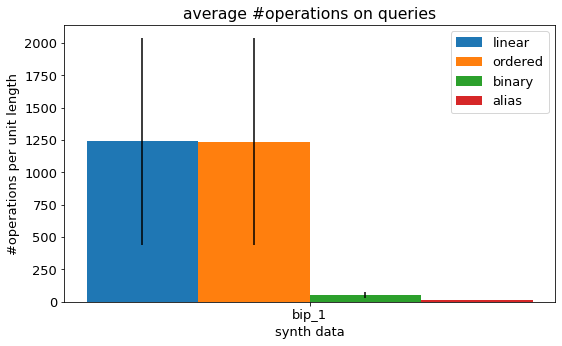

In [49]:
data = {name(i):  { e: calculate_mean_and_std(d[i][e])   for e in algos }  for i in l}
save_dic(data,"queries_synth")
plot_bar_chart(data, "synth data", "#operations per unit length", "average #operations on queries", "queries_synth_bip.pdf")

In [16]:
# data = {i:  { e: calculate_mean_and_std(d[i][e])   for e in algos }  for i in l if i[0]!="gr"}
# plot_bar_chart(data, "synth data", "#operations", "average #operations on queries", "queries2.pdf")

In [47]:
#launch bars on pre-computations
import subprocess
algos = ["linear", "ordered", "binary", "alias"]
d_pre = { i: {alg:[]   for alg in algos}  for i in l }
for x in l:
    i = x[1]
    for alg in algos:
        file =  x[0] +  "_" + str(nb_nodes) + "_" + repr(i) + "_" + alg + "/pre_time.csv"
        ll = read_integers_from_file(folder_path+"/"+file)
        d_pre[x][alg] = ll

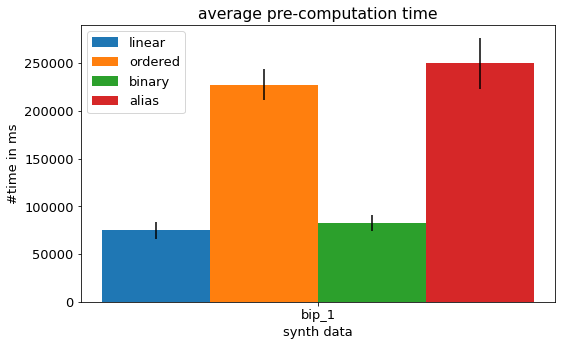

In [50]:
data = {name(i):  { e: calculate_mean_and_std(d_pre[i][e])   for e in algos }  for i in l}
save_dic(data,"pre_computation_synth")
plot_bar_chart(data, "synth data", "#time in ms", "average pre-computation time", "pre_comp_synth_bip.pdf")

In [20]:
# data = {i[0]+"_"+repr(i[1]):  { e: calculate_mean_and_std(d_pre[i][e])   for e in algos }  for i in l if i[0]!="gr"}
# plot_bar_chart(data, "er, p = (xlog(n)/n)", "#time in ms", "average pre-computation time", "pre_comp2.pdf")